## Importing Libaries

In [2]:
## Regular Expression
import re

## Arrays
import numpy as np

## DataFrames
import pandas as pd

## Visualizations
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import matplotlib.colors as colors

## Scrapping
from bs4 import BeautifulSoup

## NLP
import contractions
import inflect
import spacy
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer

## Modeling
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import learning_curve
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

## Warnings
import warnings
from scipy import stats
warnings.filterwarnings('ignore')

## Display Settings

In [3]:
pd.set_option('display.width', 800)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_colwidth', 1500)

sns.set_style('white')

## Visualization Settings

In [4]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
 
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.
for i in range(len(tableau20)):
    r, g, b = tableau20[i]
    tableau20[i] = (r / 255., g / 255., b / 255.)
# Adapted from http://spartanideas.msu.edu/2014/06/28/how-to-make-beautiful-data-visualizations-in-python-with-matplotlib/


def visualization_settings():
    plt.clf()
    sns.set_style({"xtick.major.size":30,"ytick.major.size":30})
    plt.figure(figsize=(16,8))
    sns.set(font_scale=1.4)

In [5]:
df = pd.read_csv('mbti_1.csv')

In [6]:
df.head()

type  \
0  INFJ   
1  ENTP   
2  INTP   
3  INTJ   
4  ENTJ   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         posts  
0  'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|||Welcome and stuff.|||http://playeressence.com/wp-content/uploads/2013/08/RED-red-the-pokemon-master-32560474-450-338.jpg  Game. Set. Match.|||Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative...|||Basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types...  
1  'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher.  Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know you

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8675 entries, 0 to 8674
Data columns (total 2 columns):
type     8675 non-null object
posts    8675 non-null object
dtypes: object(2)
memory usage: 135.6+ KB


As seen from the above info, there is no missing/ null columns.

In [8]:
df.shape

(8675, 2)

## Sample List of Posts

In [9]:
[p.split('|||') for p in df.head(3).posts]

[["'http://www.youtube.com/watch?v=qsXHcwe3krw",
  'http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg',
  'enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks',
  'What has been the most life-changing experience in your life?',
  'http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.',
  'May the PerC Experience immerse you.',
  'The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206',
  "Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...",
  '84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04

The number of users is __8675__

## Mapping Personalities

In [10]:
personalities = {'I':'Introversion', 'E':'Extroversion', 'N':'Intuition', 'S':'Sensing', 
                 'T':'Thinking',     'F': 'Feeling',     'J':'Judging',   'P': 'Perceiving'}

In [11]:
## Counting personality types

# First way
per_types = df.groupby('type').agg({'type':'count'})

# Second way
personality_types = df['type'].value_counts()
personality_types

INFP    1832
INFJ    1470
INTP    1304
INTJ    1091
ENTP     685
ENFP     675
ISTP     337
ISFP     271
ENTJ     231
ISTJ     205
ENFJ     190
ISFJ     166
ESTP      89
ESFP      48
ESFJ      42
ESTJ      39
Name: type, dtype: int64

## EDA

<Figure size 432x288 with 0 Axes>

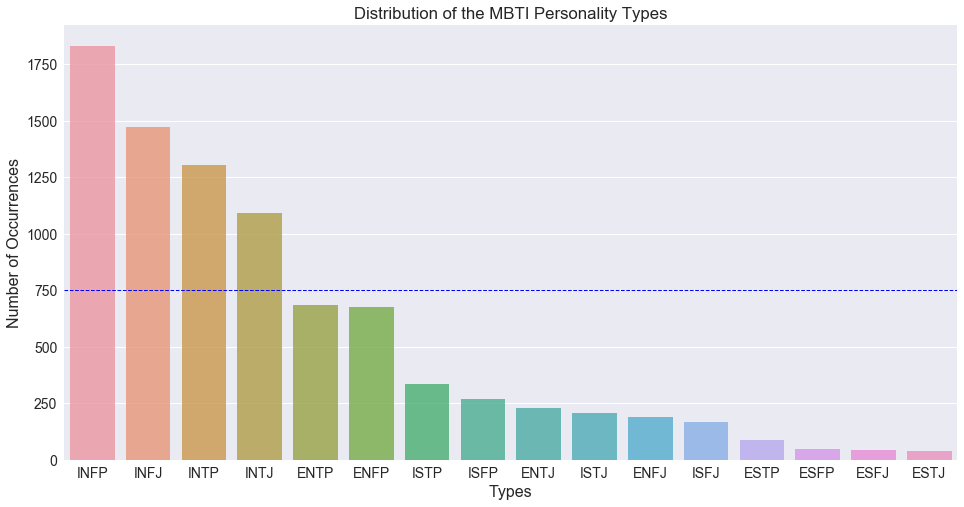

In [12]:
## Personality types
personality_types = df['type'].value_counts()

visualization_settings()
sns.barplot(personality_types.index, personality_types.values, alpha=0.8)
sns.set_style('white')
sns.despine()

# The blue line
plt.axhline(y=750, color="blue", linestyle='--', linewidth=1)

# Label customizing
plt.ylabel('Number of Occurrences', fontsize=16)
plt.xlabel('Types', fontsize=16)
plt.title("Distribution of the MBTI Personality Types")
plt.show()

Blue line shows the number of 750. It is defined to show above of some level (which is 750). According to the graphic __`INFP, INFJ, INTP and INTJ`__ are the most common personality types and all of them are __Intoversion__ type peoples. This is __`unbalanced`__ data as we can understand from the graphic.

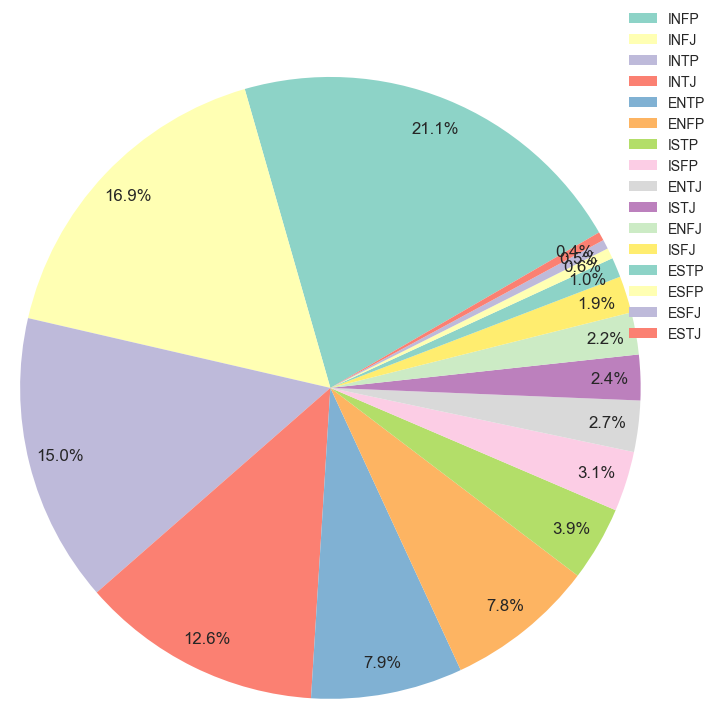

In [13]:
# Pie chart
labels = personality_types.index
values = personality_types.values

#colors
color_list = plt.cm.Set3(np.linspace(0, 1, 12))
plt.figure(figsize=(10,10))

plt.pie(values, colors = color_list, autopct='%1.1f%%', startangle=30, pctdistance=0.9, labeldistance=4, radius=1.2)
plt.legend(personality_types.index, loc=1, bbox_to_anchor=(1.1, 1.1))
plt.rcParams['font.size'] = 11.5
plt.tight_layout()

The __most common__ personality type is `INFP` with about 21% and the __least common__ one is `ESTJ` with around 0.3%.

In [14]:
mapping = {
    'I': 'Introversion',
    'E': 'Extroversion',
    'N': 'Intuition',
    'S': 'Sensing',
    'T': 'Thinking',
    'F': 'Feeling',
    'J': 'Judging',
    'P': 'Perceiving',
}

In [15]:
temp_df = pd.DataFrame()
for c in 'INTJESFP':
    temp_df[c] = df['type'].map(lambda x: 1 if c in x else 0)

<Figure size 432x288 with 0 Axes>

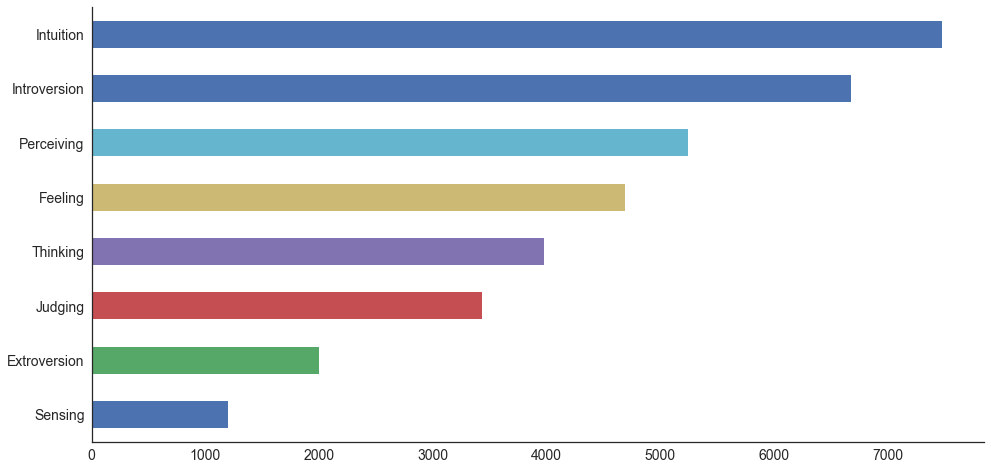

In [16]:
visualization_settings()
sns.set_style('white')
color_list = plt.cm.Set3(np.linspace(0, 1, 12))
_ = temp_df.sum().sort_values().rename(lambda x: mapping[x]).plot.barh()
sns.despine()

In [17]:
## Post length show us what length (how many chars) the posts are
df['post_length'] = df['posts'].map(len)

In [18]:
def get_types(person):
    selected_type=person['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if selected_type[0] == 'I': 
        I = 1
    elif selected_type[0] == 'E': 
        I = 0
    else: print('I-E incorrect')
        
    if selected_type[1] == 'N': 
        N = 1
    elif selected_type[1] == 'S': 
        N = 0
    else: print('N-S incorrect')
        
    if selected_type[2] == 'T': 
        T = 1
    elif selected_type[2] == 'F': 
        T = 0
    else: print('T-F incorrect')
        
    if selected_type[3] == 'J': 
        J = 1
    elif selected_type[3] == 'P': 
        J = 0
    else: print('J-P incorrect')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

In [19]:
data = df.join(df.apply (lambda row: get_types (row), axis=1))

In [20]:
df= data
df.head()

type  \
0  INFJ   
1  ENTP   
2  INTP   
3  INTJ   
4  ENTJ   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         posts  \
0  'http://www.youtube.com/watch?v=qsXHcwe3krw|||http://41.media.tumblr.com/tumblr_lfouy03PMA1qa1rooo1_500.jpg|||enfp and intj moments  https://www.youtube.com/watch?v=iz7lE1g4XM4  sportscenter not top ten plays  https://www.youtube.com/watch?v=uCdfze1etec  pranks|||What has been the most life-changing experience in your life?|||http://www.youtube.com/watch?v=vXZeYwwRDw8   http://www.youtube.com/watch?v=u8ejam5DP3E  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   http://vimeo.com/22842206|||Hello ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390  http://wallpaperpassion.com/upload/23700/friendship-boy-and-girl-wallpaper.jpg  http://assets.dornob.com/wp-content/uploads/2010/04/round-home-design.jpg ...|||Welcome and stuff.|||http://playeressence.com/wp-content/uploads/2013/08/RED-red-the-pokemon-master-32560474-450-338.jpg  Game. Set. Match.|||Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in your same desk chair), weed in moderation (maybe try edibles as a healthier alternative...|||Basically come up with three items you've determined that each type (or whichever types you want to do) would more than likely use, given each types...   
1  'I'm finding the lack of me in these posts very alarming.|||Sex can be boring if it's in the same position often. For example me and my girlfriend are currently in an environment where we have to creatively use cowgirl and missionary. There isn't enough...|||Giving new meaning to 'Game' theory.|||Hello *ENTP Grin*  That's all it takes. Than we converse and they do most of the flirting while I acknowledge their presence and return their words with smooth wordplay and more cheeky grins.|||This + Lack of Balance and Hand Eye Coordination.|||Real IQ test I score 127. Internet IQ tests are funny. I score 140s or higher.  Now, like the former responses of this thread I will mention that I don't believe in the IQ test. Before you banish...|||You know you're an ENTP when you vanish from a site for a year and a half, return, and find people are still commenting on your posts and liking your ideas/thoughts. You know y

In [21]:
print ("Introversion (I) - Extroversion (E):\t", df['IE'].value_counts()[0], " / ", df['IE'].value_counts()[1])
print ("Intuition    (N) – Sensing      (S):\t", df['NS'].value_counts()[0], " / ", df['NS'].value_counts()[1])
print ("Thinking     (T) – Feeling      (F):\t", df['TF'].value_counts()[0], " / ", df['TF'].value_counts()[1])
print ("Judging      (J) – Perceiving   (P):\t", df['JP'].value_counts()[0], " / ", df['JP'].value_counts()[1])

Introversion (I) - Extroversion (E):	 1999  /  6676
Intuition    (N) – Sensing      (S):	 1197  /  7478
Thinking     (T) – Feeling      (F):	 4694  /  3981
Judging      (J) – Perceiving   (P):	 5241  /  3434


<Figure size 432x288 with 0 Axes>

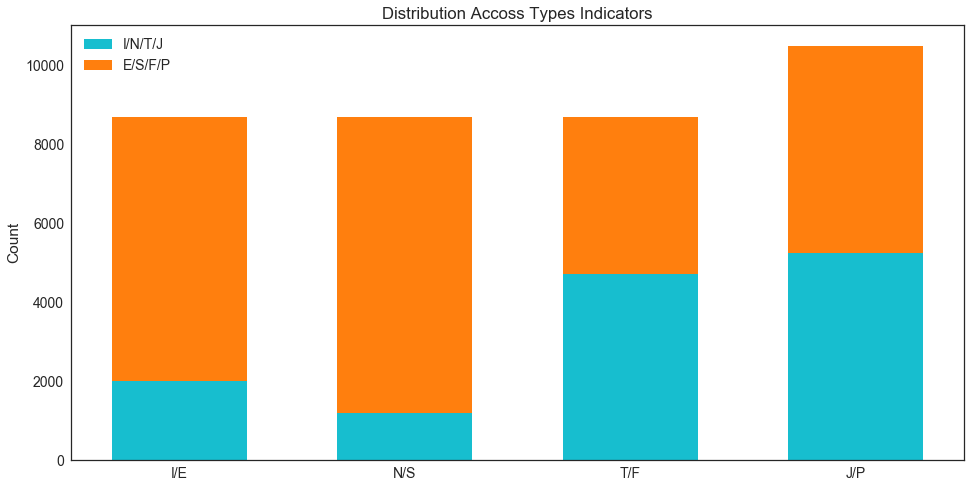

In [22]:
bottom_graphic = (df['IE'].value_counts()[0], df['NS'].value_counts()[0],df['TF'].value_counts()[0], df['JP'].value_counts()[0])
top_graphic =(df['IE'].value_counts()[1], df['NS'].value_counts()[1], df['TF'].value_counts()[1], df['JP'].value_counts()[0])

indis = np.arange(4) # There are 4 different couples such as IE NS TF JP
width = 0.6 
visualization_settings()
sns.set_style('white')
sns.despine(left=True, bottom=True)

plot_1 = plt.bar(indis, bottom_graphic, width, color=tableau20[18])
plot_2 = plt.bar(indis, top_graphic, width, bottom= bottom_graphic, color=tableau20[2])

plt.ylabel('Count')
plt.title('Distribution Accoss Types Indicators')
plt.xticks(indis, ('I/E',  'N/S', 'T/F', 'J/P',))
plt.legend((plot_1, plot_2), ('I/N/T/J', 'E/S/F/P'))

Let's check length of posts

In [23]:
post_length = df.groupby('type')['post_length'].mean().astype(int).sort_values(ascending=False)

## post_length shows the mean of post for each personality type

Average Post Length:  7234.98962536023


<Figure size 432x288 with 0 Axes>

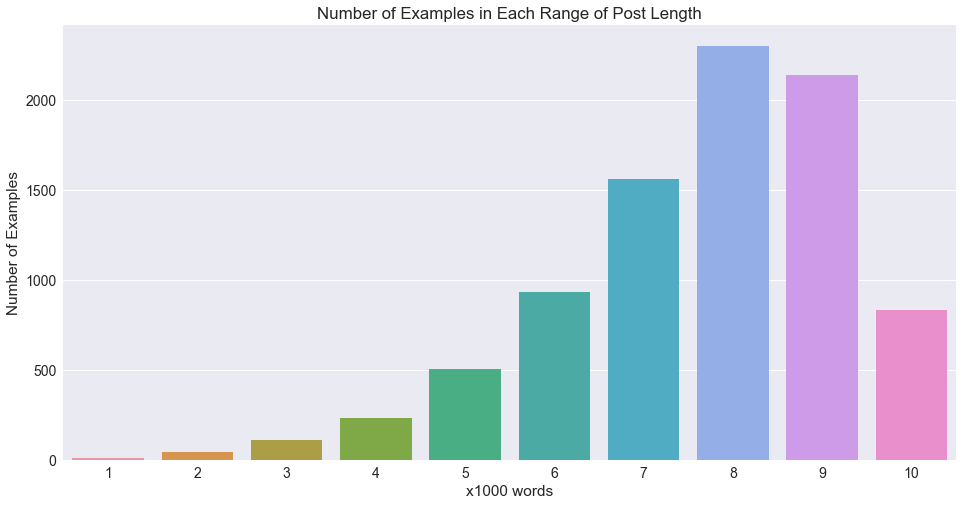

In [24]:
visualization_settings()
ranges = pd.cut(df['post_length'], 10, labels=np.arange(1, 11)) # split length into ranges (1-1000, 1001-2000)
cnt = ranges.value_counts()
plt.clf()
sns.barplot(cnt.index, cnt.values)
sns.set_style('white')
sns.despine()
plt.xlabel('x1000 words')
plt.ylabel('Number of Examples')
plt.title('Number of Examples in Each Range of Post Length')

print('Average Post Length: ', df['post_length'].mean()) # can be used to decide the no of features we should consider

<Figure size 432x288 with 0 Axes>

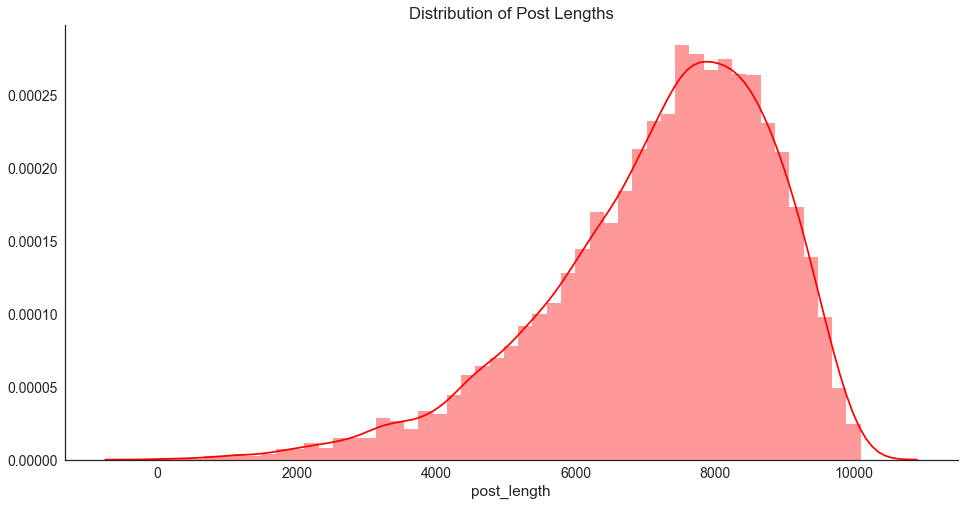

In [25]:
visualization_settings()
sns.set_style('white')
sns.distplot(df["post_length"], color='red').set_title("Distribution of Post Lengths")
sns.despine()

This graphic shows ditribution of post lengths for all people (Each person has 50 posts)

<Figure size 432x288 with 0 Axes>

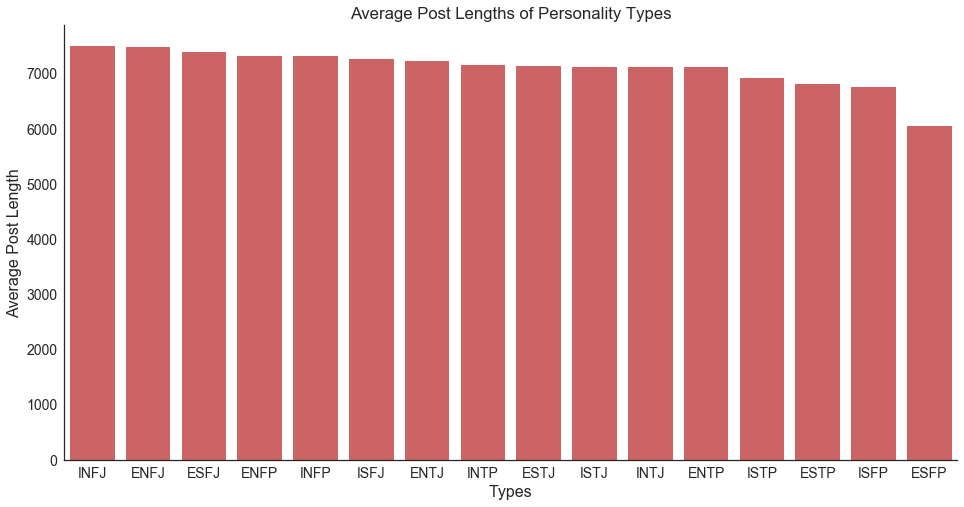

In [26]:
visualization_settings()
sns.set_style('white')
sns.barplot(post_length.index, post_length.values, alpha=0.8, color=tableau20[6])

# Label customizing
plt.ylabel('Average Post Length', fontsize=16)
plt.xlabel('Types', fontsize=16)
plt.title("Average Post Lengths of Personality Types")
sns.despine()
plt.show()

The graphic shows the __average of post length for each personality type__

In [27]:
## words_per_comment shows how many words there appears in each comment block for each user. Note that every user has 50 comments in our data set.
df['words_per_comment'] = df['posts'].map(lambda x : len(x.split())/50)

<Figure size 432x288 with 0 Axes>

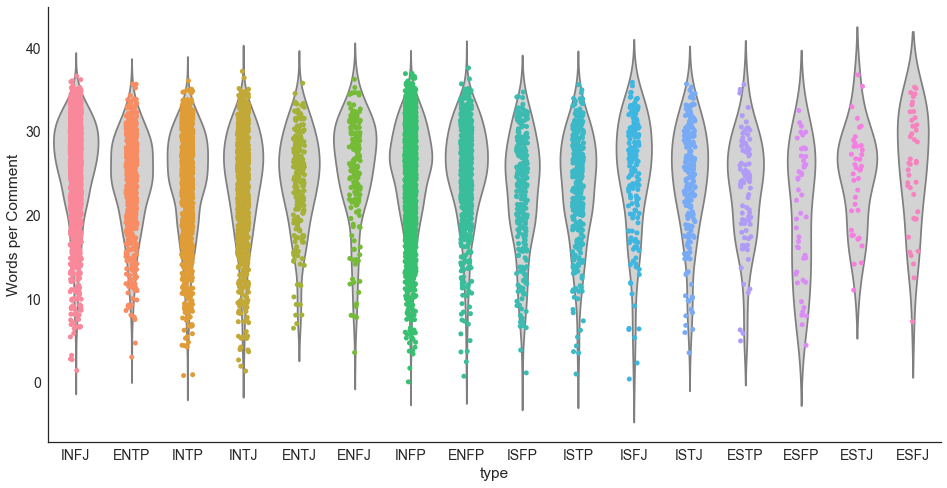

In [28]:
visualization_settings()
sns.set_style('white')
sns.violinplot(x='type', y='words_per_comment', data=df, inner=None, color='lightgray')
sns.stripplot(x='type', y='words_per_comment', data=df, size=5, jitter=True)
plt.ylabel('Words per Comment')
sns.despine()

#### As we can figure out from the graphic Extraversion personality type has less variance for words for each comment, particularly last 4 types are Extroversion.

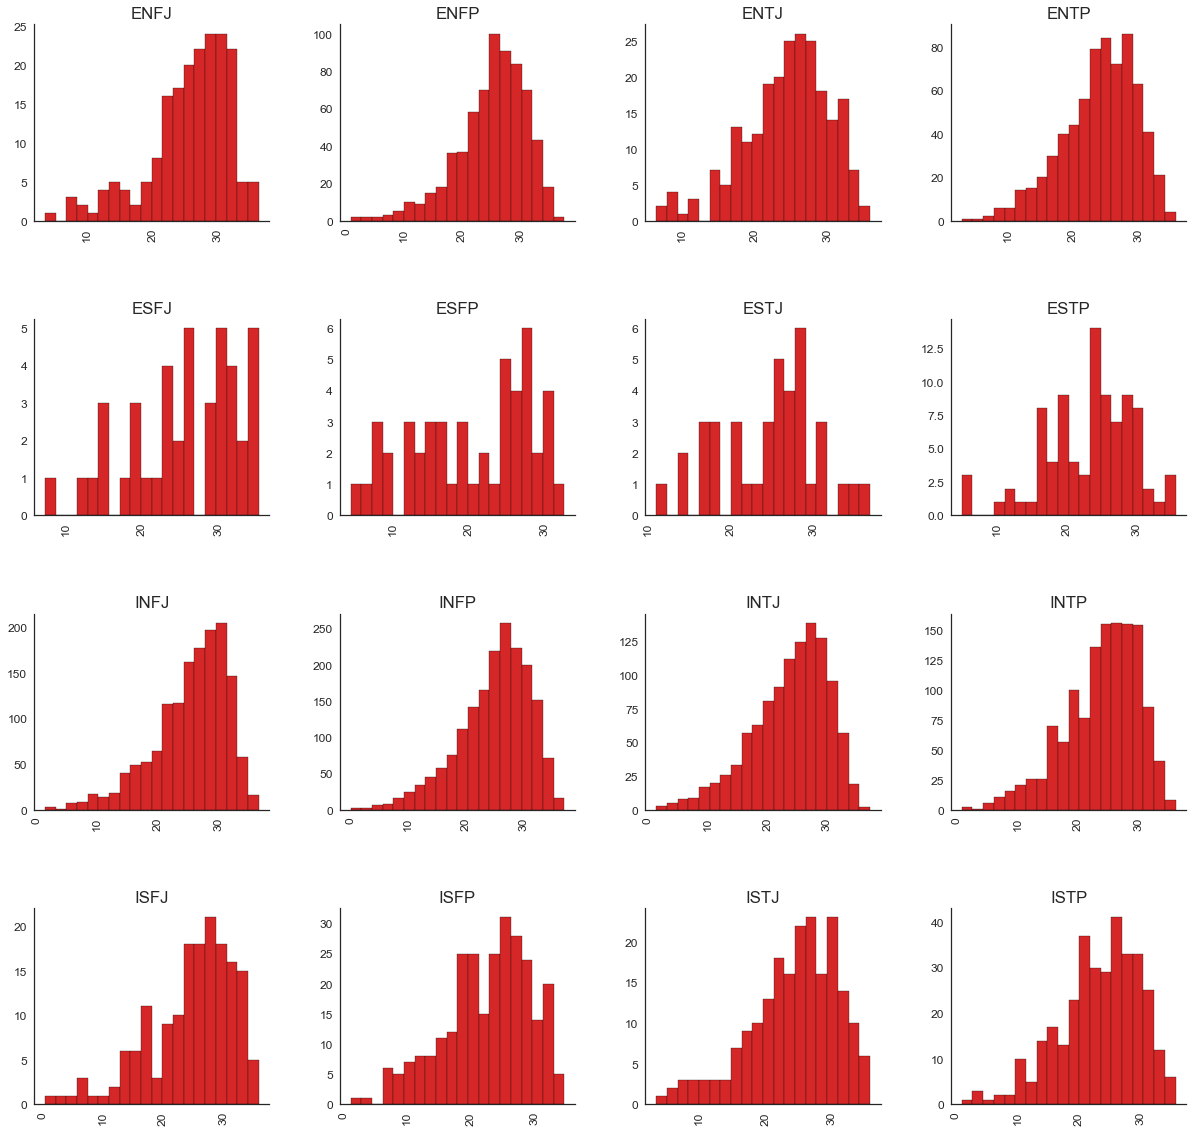

In [29]:
df.hist(column='words_per_comment', by = "type", grid=False, bins=20,xlabelsize=12, ylabelsize=12,figsize = (20,20), color=tableau20[6], edgecolor='black') 
sns.despine()

## Feature Correlation

In [30]:
correlation = df[['IE', 'NS', 'TF', 'JP']].corr()
correlation

IE        NS        TF        JP
IE  1.000000 -0.045899 -0.069573  0.161939
NS -0.045899  1.000000 -0.080954  0.014922
TF -0.069573 -0.080954  1.000000 -0.004673
JP  0.161939  0.014922 -0.004673  1.000000

Let's see the correlation through heatmap

<Figure size 432x288 with 0 Axes>

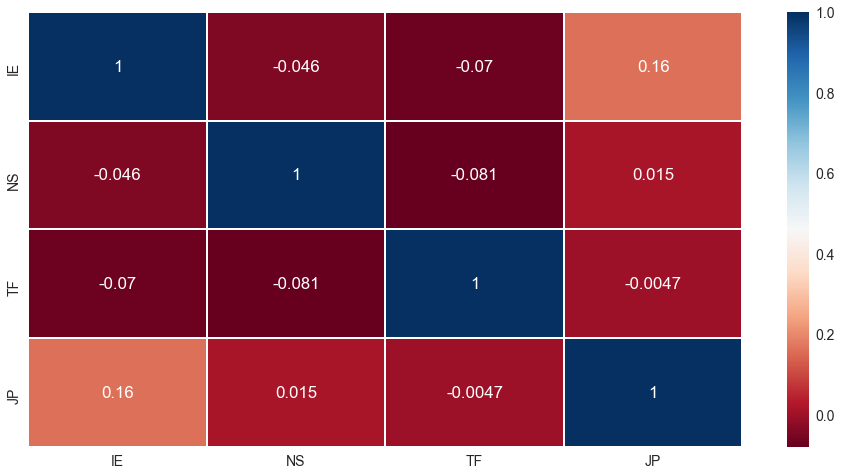

In [31]:
visualization_settings()
cmap=plt.cm.RdBu
sns.heatmap(correlation, cmap=cmap, annot=True, linewidths=1)

We cannot see strong correlation between traits of personal characteristics from above the heat map chart.

## World Cloud

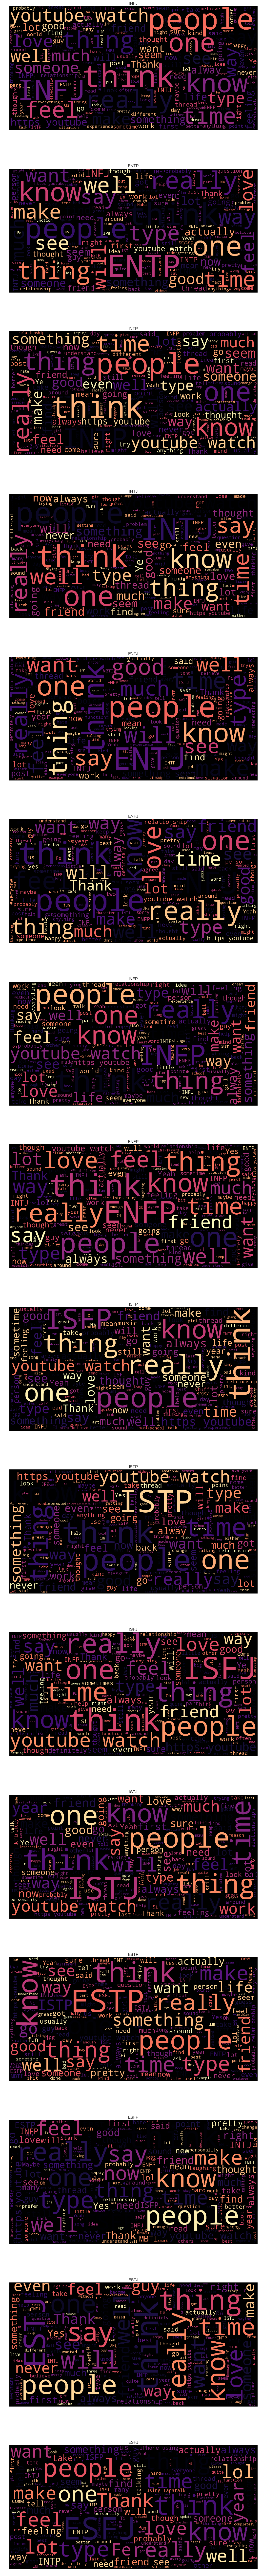

In [32]:
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS

fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(18,12*len(df['type'].unique())))

k = 0
for i in df['type'].unique():
    df_temp = df[df['type'] == i]
    wordcloud = WordCloud(width=1600, height=800,max_font_size=200, colormap='magma').generate(df_temp['posts'].to_string())
    ax[k].imshow(wordcloud)
    ax[k].set_title(i)
    ax[k].axis("off")
    k+=1

## Data Preprocessing

In [33]:
## Apply and Map Fuction with String

#def keep_words(text):
    #return re.sub(r'[^a-zA-Z]', ' ', text)
# df_2['clean_text'] = df_2.apply(lambda x: keep_words(x['posts']),axis=1)
# df_2['clean_text'] = df_2['clean_text'].map(keep_words)

In [34]:
df_2 = pd.DataFrame()
df_2 = df.copy()

In [46]:
#preprocess all the mbti data
import re
from nltk.stem import PorterStemmer

#nlp = spacy.load('en_core', parse=True, tag=True, entity=True)

ps = PorterStemmer()
lemmatiser = WordNetLemmatizer()
                                              
def normalize_corpus(text, lowercase=True, remove_stop_words=True, remove_mbti_profiles=True, remove_url=True):
    
    """[1] Lowercase the text 
       [2] Find URLs 
       [3] Remove links from posts and <URL> instead 
       [4] Expending contractions 
       [5] Removing ||| seperators 
       [6] Removing whitespace 
       [7] Keep only words 
       [8] Remove apostrophe sign  
       [9] Remove stopwords and Lemmatization 
      [10] Remove MBTI profiles from the posts and <MBTI> instead 
      [11] Converting 'springboard springboard' into <URL> """
    
    # Creating stopwordlist and editing 
    stopword_list= stopwords.words('english')
    
    # "no" and "not" may give us information so those are removed from stop lists
    stopword_list.remove('no') 
    stopword_list.remove('not')
    
    ##[1] Lowercase the text
    if (lowercase==True):
        text = str(text).lower()
    
    ##[2] Find URLs
    url = re.findall('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text)
    
    ##[3] Removing Links (springboard is a replacement word and later it will convert into <URL> word)
    text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', r'<springboard_springboard>', text)
    
    ##[4] Expending contractions such as I'm, you're into I am, you are
    text = contractions.fix(text)
    
    ##[5] Removing ||| seperators
    text = re.sub(r'\|\|\|', r' ', text) 
    
    ##[6] Removing whitespace
    text = re.sub(r'nbsp', r'', text)
    
    ##[7] Keeping only words
    text = re.sub(r'[^a-zA-Z]',r' ', text)
    
    ##[8] Removing ' (apostrophe) sign
    text = re.sub(r"'", r'', text)    
    
    ##[9] Removing stopwords and Lemmatization
    if (remove_stop_words==True):
        
        text = " ".join([lemmatiser.lemmatize(w) for w in text.split(' ') if w not in stopword_list])
        
    else:
        
        text = " ".join([lemmatiser.lemmatize(w) for w in text.split(' ')])
    
    ##[10] Removing MBTI types and prelace with <MBTI> word
    if (remove_mbti_profiles == True):
        text = re.sub(r'intp', r'<MBTI>', text)
        text = re.sub(r'intj', r'<MBTI>', text)
        text = re.sub(r'infj', r'<MBTI>', text)
        text = re.sub(r'infp', r'<MBTI>', text)
        text = re.sub(r'entp', r'<MBTI>', text)
        text = re.sub(r'enfp', r'<MBTI>', text)
        text = re.sub(r'istp', r'<MBTI>', text)
        text = re.sub(r'entj', r'<MBTI>', text)
        text = re.sub(r'isfj', r'<MBTI>', text)
        text = re.sub(r'enfj', r'<MBTI>', text)
        text = re.sub(r'isfp', r'<MBTI>', text)
        text = re.sub(r'esfp', r'<MBTI>', text)
        text = re.sub(r'estp', r'<MBTI>', text)
        text = re.sub(r'estj', r'<MBTI>', text)
        text = re.sub(r'esfj', r'<MBTI>', text)
        text = re.sub(r'istj', r'<MBTI>', text)
        
    ##[11] Converting 'springboard springboard' into <URL>   
    if (remove_url == True):
        text = re.sub(r'(springboard springboard)', r'<URL>', text)
        
    return text

In [47]:
df_2['clean_text'] = df_2['posts'].map(normalize_corpus)

In [48]:
## We can select 5 random cleaned_text from our corpus
df_2.iloc[np.random.choice(len(df_2),5)]

type  \
323   INTP   
7412  ISTP   
4929  INFP   
6318  ENTJ   
7654  INTP   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            posts  \
323   'I think psych and philosophy are definitely it for me. Language, art and media are other areas of interest and I can probably pursue those in my own time...   Things seem much clearer to me now...|||I always plan do do that so I can be ahead but I never follow through. I'm calm about it all but deep down I hate myself for being such a lazy arse. *sigh :P|||If I were to change it to make it related to cigarettes...  (could be better but I cbf to perfect it)   Filling up with smoke, She feels shex92s going to choke, Thoughts like an anchor. So much...|||Filling up with smoke,  She feels shex92s going to choke,  Thoughts like an anchor.   So much to confess,  Tormented by the turmoil,  Shex92s dying of stress.|||I got into the habit of writing personally. I debate a lot and although I love intellectual arguments I like to write with humour as well. Normally things are funnier when they are personal..Idk, I...|||Oh, I said *my other two posts were rubbish. I was going on about me making typos or something :P I'm sorry if i came across as emotional, I was just slightly irritated cos I hate feeling like...|||Hahaha she could stay hidden in *my room =P Hhmm Placebo is a great band :] Isn't it an INTP trait to be all for experience? I want to experience life, all aspects of it. I love knowledge. But I...|||Ooh I forgot to add that I can be classified as xNTP..I'm about 55-60% Introvert...|||I'm an INTP at this point in life.That, I am sure of...and you said something along the l...   
7412  Just because you don't like the fact Reagan didn't share your politics doesn't give you the right to lie about him.|||MisterPerfect  I'd rather you not tell me things I (and pretty much everyone else) already know.|||Thanks, I found this just now checking a new mention.|||It seems you're looking a the economy through rose colored glasses.|||Jobs have never been at the very top. Also if the the economy was growing all types of businesses would be hiring.|||First I never said the economy was individuals, second if the economy was growing it would benefit all classes.|||Then why are so many people protesting for an increase in minimum wage? Why are so many supporting candidates that promise to lower costs or remove cost altogether for certain things? Also you should...|||I think genre exists because many people have preferences.|||Wishmaster, The Grudge, and Hellraiser when I saw them fo

In [50]:
#url

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

## Splitting Into Train, Validation and Test Set

In [52]:
## Train, validation and test split 
## We split the data 80% as train set and 20% as test set

X_train, X_test, y_train, y_test = train_test_split(df_2[['clean_text']], df_2['type'], test_size=0.2, random_state=33)

In [53]:
print ('Train Set Shape\t\t:{}\nTest Set Shape\t\t:{}'.format(X_train.shape, X_test.shape))

Train Set Shape		:(6940, 1)
Test Set Shape		:(1735, 1)


In [54]:
X_train['post_length'] = X_train['clean_text'].map(len)

In [55]:
df_2.isnull().sum()

type                 0
posts                0
post_length          0
IE                   0
JP                   0
NS                   0
TF                   0
words_per_comment    0
clean_text           0
dtype: int64

There is no missing value in our dataset, which is good.

In [56]:
nlp = spacy.load('en_core_web_sm')

## Tfidf Vectorizing

In [57]:
vectorizer_mtbi = TfidfVectorizer(ngram_range=(1, 1), 
                         stop_words='english',
                         lowercase = True, 
                         max_features = 5000)
#vectorizer_mtbi = CountVectorizer(min_df=10,stop_words=‘english’)

In [58]:
from sklearn.metrics import classification_report

## ExtraTreesClassifier with SVD¶

In [59]:
etc = ExtraTreesClassifier(n_estimators = 20, max_depth=4, n_jobs = -1)
tfidf = TfidfVectorizer(ngram_range=(1, 1), stop_words='english')
tsvd = TruncatedSVD(n_components=10)
model = Pipeline([('tfidf1', tfidf), ('tsvd1', tsvd), ('etc', etc)])


In [60]:
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

In [61]:
np.random.seed(1)

scoring = {'acc': 'accuracy',
           'neg_log_loss': 'neg_log_loss',
           'f1_micro': 'f1_micro'}

results = cross_validate(model, X_train['clean_text'], y_train, cv=kfolds, scoring=scoring, n_jobs=-1)

In [62]:
print("CV Accuracy: {:0.4f} (+/- {:0.4f})".format(np.mean(results['test_acc']), np.std(results['test_acc'])))

print("CV F1: {:0.4f} (+/- {:0.4f})".format(np.mean(results['test_f1_micro']), np.std(results['test_f1_micro'])))

print("CV Logloss: {:0.4f} (+/- {:0.4f})".format(np.mean(-1*results['test_neg_log_loss']),np.std(-1*results['test_neg_log_loss'])))

CV Accuracy: 0.2274 (+/- 0.0047)
CV F1: 0.2274 (+/- 0.0047)
CV Logloss: 2.2222 (+/- 0.0035)


## Naive Bayes

In [63]:
np.random.seed(1)

tfidf2 = CountVectorizer(ngram_range=(1, 1), 
                         stop_words='english',
                         lowercase = True, 
                         max_features = 5000)

model_nb = Pipeline([('tfidf1', tfidf2), ('nb', MultinomialNB())])

results_nb = cross_validate(model_nb, X_train['clean_text'], y_train, cv=kfolds, scoring=scoring, n_jobs=-1)

In [64]:
print("CV Accuracy: {:0.4f} (+/- {:0.4f})".format(np.mean(results_nb['test_acc']), np.std(results_nb['test_acc'])))

print("CV F1: {:0.4f} (+/- {:0.4f})".format(np.mean(results_nb['test_f1_micro']), np.std(results_nb['test_f1_micro'])))

print("CV Logloss: {:0.4f} (+/- {:0.4f})".format(np.mean(-1*results_nb['test_neg_log_loss']), np.std(-1*results_nb['test_neg_log_loss'])))

CV Accuracy: 0.3686 (+/- 0.0109)
CV F1: 0.3686 (+/- 0.0109)
CV Logloss: 9.0117 (+/- 0.3019)


## Logistic Regression

In [65]:
np.random.seed(1)

tfidf2 = CountVectorizer(ngram_range=(1, 1), stop_words='english',lowercase = True, max_features = 5000)

model_lr = Pipeline([('tfidf1', tfidf2), ('lr', LogisticRegression(class_weight="balanced", C=0.005))])

results_lr = cross_validate(model_lr, X_train['clean_text'], y_train, cv=kfolds, scoring=scoring, n_jobs=-1)

In [66]:
print("CV Accuracy: {:0.4f} (+/- {:0.4f})".format(np.mean(results_lr['test_acc']), np.std(results_lr['test_acc'])))

print("CV F1: {:0.4f} (+/- {:0.4f})".format(np.mean(results_lr['test_f1_micro']), np.std(results_lr['test_f1_micro'])))

print("CV Logloss: {:0.4f} (+/- {:0.4f})".format(np.mean(-1*results_lr['test_neg_log_loss']), np.std(-1*results_lr['test_neg_log_loss'])))

CV Accuracy: 0.3577 (+/- 0.0145)
CV F1: 0.3577 (+/- 0.0145)
CV Logloss: 2.0108 (+/- 0.0243)
